/home/arnaud/miniconda3/envs/superres/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
vqvae/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]An error occurred while trying to fetch /home/arnaud/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/arnaud/.cache/huggingface/hub/models--C

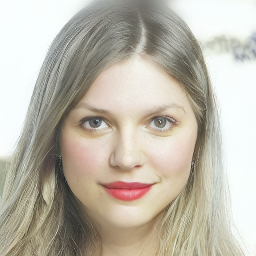

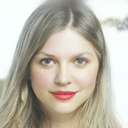

100%|██████████| 100/100 [00:04<00:00, 22.61it/s]


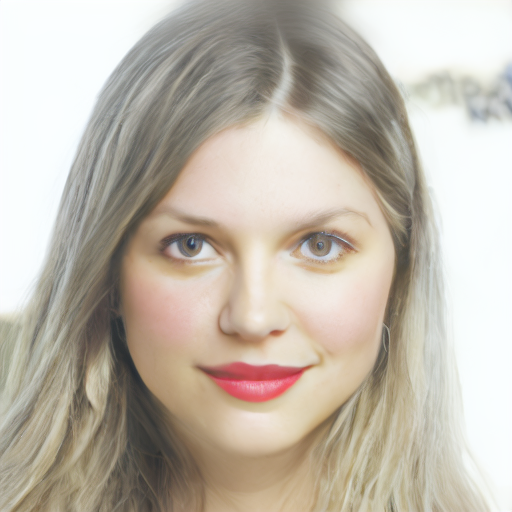

In [1]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "CompVis/ldm-super-resolution-4x-openimages"

# load model and scheduler
pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)

# let's download an  image
url = "https://user-images.githubusercontent.com/38061659/199705896-b48e17b8-b231-47cd-a270-4ffa5a93fa3e.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
display(low_res_img)
low_res_img = low_res_img.resize((128, 128))
display(low_res_img)

# run pipeline in inference (sample random noise and denoise)
upscaled_image = pipeline(low_res_img, num_inference_steps=100, eta=1).images[0]
# save image
display(upscaled_image)
upscaled_image.save("ldm_generated_image.png")

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/arnaud/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/arnaud/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/arnaud/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/arnaud/.cache/huggingface/hub/models--CompVis--ldm-super-resolution-4x-openimages/snapshots/0b55ddf931a8e3a1b426b3a50ddcf325ff84f668/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


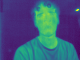

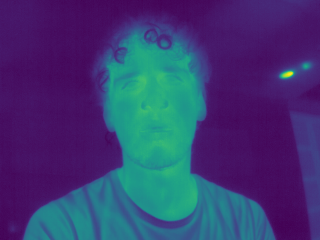

  0%|          | 0/100 [00:00<?, ?it/s]

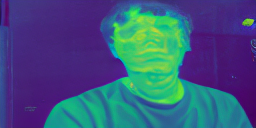

In [2]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import LDMSuperResolutionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "CompVis/ldm-super-resolution-4x-openimages"

# load model and scheduler
pipeline = LDMSuperResolutionPipeline.from_pretrained(model_id)
pipeline = pipeline.to(device)


low_res_img = Image.open("../HIRA/data/images_l/lb1_l_0.png").convert("RGB")
display(low_res_img)
high_res_img = Image.open("../HIRA/data/images_h/lb1_h_0.png").convert("RGB")
display(high_res_img)
# low_res_img = low_res_img.resize((128, 128))
# display(low_res_img)

# run pipeline in inference (sample random noise and denoise)
upscaled_image = pipeline(low_res_img, num_inference_steps=100, eta=1).images[0]
# save image
display(upscaled_image)
upscaled_image.save("ldm_generated_image.png")